**Problem Statement**

XYZ company's 2014-2018 sales data to identify key revenue and profit drivers across products , channels and regions.
Uncover seasonal trends and outliers and align performance against budgets. Use these insights to optimize pricing , promotions and market expansion for sustainable growth and reduced concentration risk.




In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()




Saving Regional Sales Dataset.xlsx to Regional Sales Dataset.xlsx


In [ ]:
sheets = pd.read_excel("Regional Sales Dataset.xlsx",sheet_name = None)



In [ ]:
#Assign dataframes to each sheets

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_products = sheets['Products']
df_budgets = sheets['2017 Budgets']

In [ ]:
print("df_sales shape ",(df_sales.shape))
print("df_customers shape ",(df_customers.shape))
print("df_products shape ",(df_products.shape))
print("df_regions shape ",(df_regions.shape))
print("df_budgets shape ",(df_budgets.shape))
print("df_state_reg shape ",(df_state_reg.shape))

df_sales shape  (64104, 12)
df_customers shape  (175, 2)
df_products shape  (30, 2)
df_regions shape  (994, 15)
df_budgets shape  (30, 2)
df_state_reg shape  (49, 3)


In [ ]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop = True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


DATA CLEANING OR WRANGLING


In [ ]:
# Merge with Customers
df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
#Merge with Products
df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [ ]:
# Merge with Regions

df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
# Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how = 'left',
    left_on = 'state_code',
    right_on = 'State Code'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [ ]:
# Merge with Budgets 2017
df = df.merge(
    df_budgets,
    how = 'left',
    on = 'Product Name'
)

In [ ]:
df.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231


In [ ]:
df.to_csv('file.csv')

In [ ]:
#CleanUp Redundant Columns

columns_to_drop = ["Customer Index","Index","id","State Code"]
df = df.drop(columns = columns_to_drop,errors='ignore')

df.head(3)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270


In [ ]:
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [ ]:
# Keep the important columns and delete the columns that we don't need
columns_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]





In [ ]:
df = df[columns_to_keep]

In [ ]:
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
# Blank out budgets for non-2017 budgets
df.loc[df['orderdate'].dt.year != 2017, '2017 budgets'] = pd.NA

In [ ]:
# Filter the dataset to include only records from year 2017
df_2017 = df[df['orderdate'].dt.year == 2017]

In [ ]:
df.isnull().sum()

,0
ordernumber,0
orderdate,0
customer names,0
channel,0
product name,0
order quantity,0
unit price,0
line total,0
total unit cost,0
state_code,0


In [ ]:
df_2017.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


# Feature Enineering


In [ ]:
df['total_cost'] = df['order quantity'] * df['total unit cost']

In [ ]:
df['profit'] = df['line total'] - df['total_cost']
df['profit_margin_percentage'] = df['profit']/df['line total'] * 100

In [ ]:
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets,total_cost,profit,profit_margin_percentage
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


# Exploratory Data Analysis

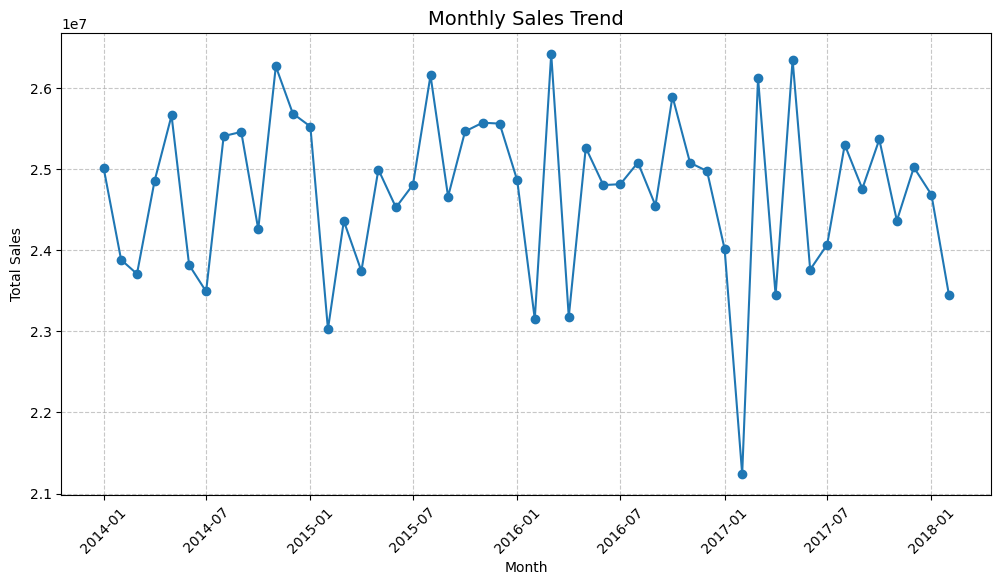

In [ ]:
# 1. Make sure orderdate is in datetime format
df['orderdate'] = pd.to_datetime(df['orderdate'])

# 2. Create a 'month' column (year-month)
df['month'] = df['orderdate'].dt.to_period('M')

# 3. Group by month and sum the sales (using 'line total')
monthly_sales = df.groupby('month')['line total'].sum()

# 4. Convert Period to timestamp for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# 5. Plot the line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')

plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)

plt.show()


In [ ]:
# Make sure orderdate is in datetime format
df['orderdate'] = pd.to_datetime(df['orderdate'])

# Remove records from 2018-01 and 2018-02
new_df = df[~((df['orderdate'].dt.year == 2018) & (df['orderdate'].dt.month.isin([1, 2])))]


/tmp/ipython-input-2866506025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['orderdate'] = pd.to_datetime(new_df['orderdate'])
/tmp/ipython-input-2866506025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month'] = df['orderdate'].dt.month
/tmp/ipython-input-2866506025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

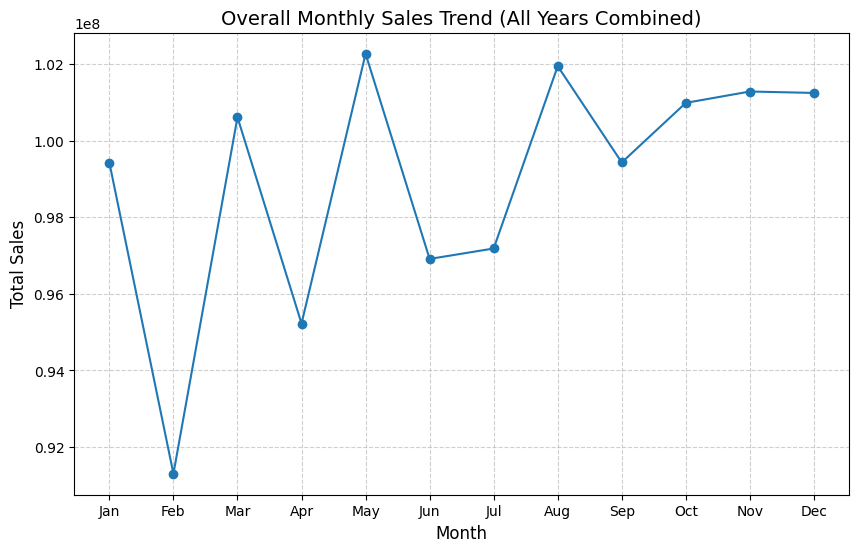

In [ ]:
# Assuming your dataframe is called df and orderdate is in YYYY-MM-DD format
new_df['orderdate'] = pd.to_datetime(new_df['orderdate'])

# Extract month name and month number
new_df['month'] = df['orderdate'].dt.month
new_df['month_name'] = df['orderdate'].dt.strftime('%b')

# Aggregate sales (line total) by month across all years
monthly_sales = new_df.groupby(['month', 'month_name'])['line total'].sum().reset_index()

# Sort by month number to ensure correct order
monthly_sales = monthly_sales.sort_values('month')

# Plot
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['month_name'], monthly_sales['line total'], marker='o', linestyle='-')

plt.title("Overall Monthly Sales Trend (All Years Combined)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


/tmp/ipython-input-3226505851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')
/tmp/ipython-input-3226505851.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_products, x='line total', y='product name', palette='viridis')


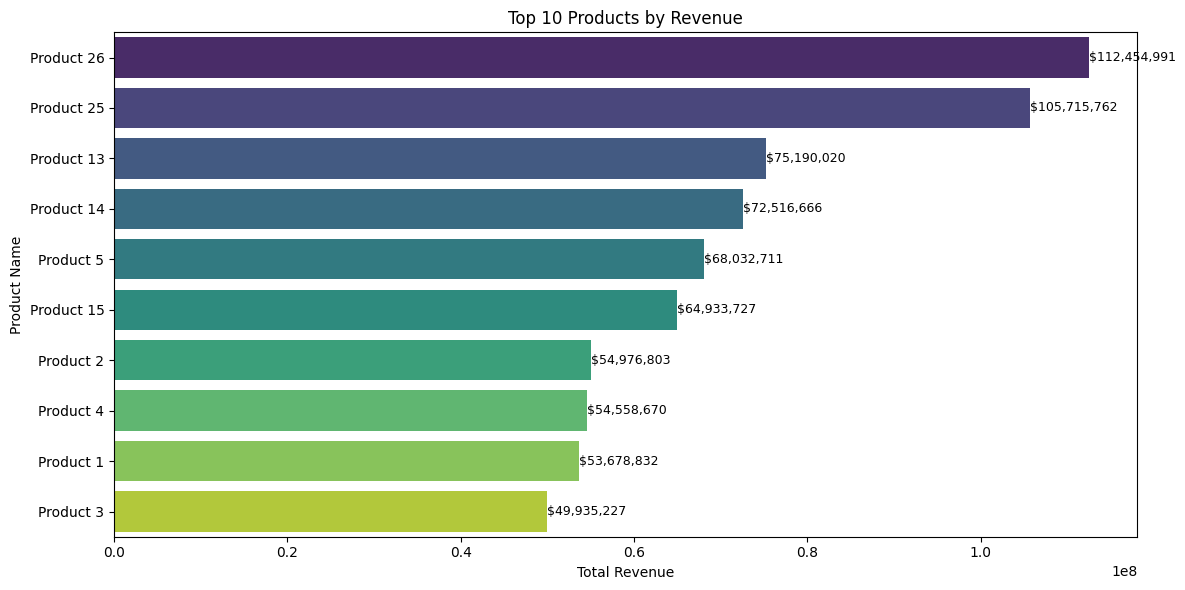

In [ ]:
# Ensure correct dtypes if needed
new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')

# Group by product name and sum the revenue
top_products = (
    new_df.groupby('product name')['line total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_products, x='line total', y='product name', palette='viridis')

# Add labels on each bar
for i, (value, name) in enumerate(zip(top_products['line total'], top_products['product name'])):
    ax.text(value, i, f'${value:,.0f}', va='center', ha='left', fontsize=9)

plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1031470458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')
/tmp/ipython-input-1031470458.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom_products, x='line total', y='product name', palette='coolwarm')


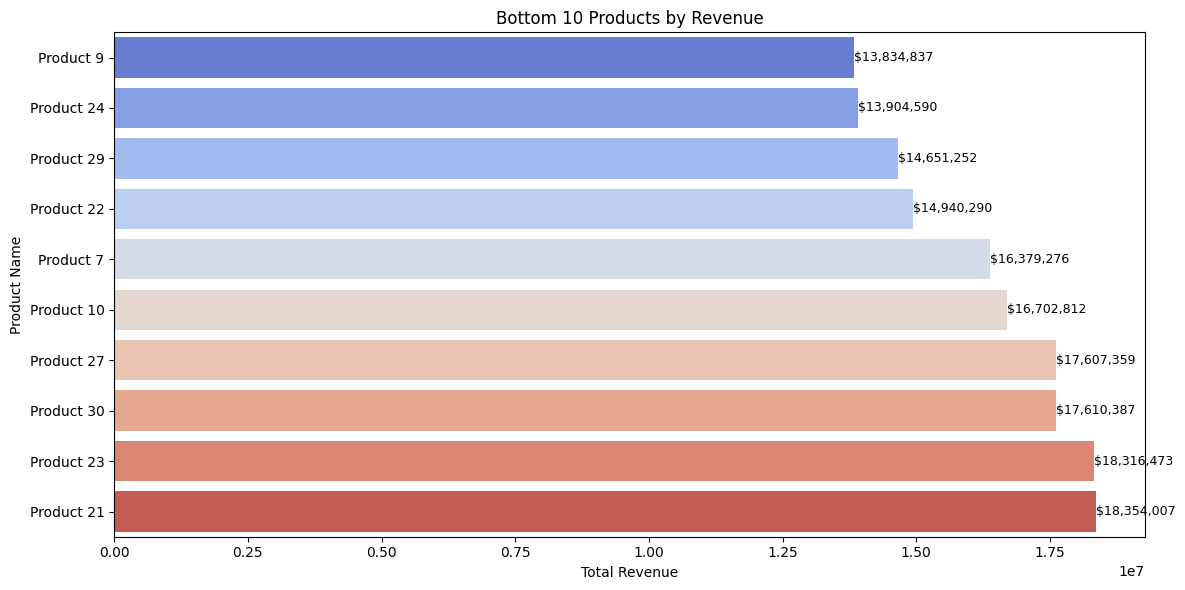

In [ ]:
# Ensure 'line total' is numeric
new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')

# Group by product and get bottom 10 by revenue
bottom_products = (
    new_df.groupby('product name')['line total']
    .sum()
    .sort_values(ascending=True)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bottom_products, x='line total', y='product name', palette='coolwarm')

# Add labels on each bar
for i, (value, name) in enumerate(zip(bottom_products['line total'], bottom_products['product name'])):
    ax.text(value, i, f'${value:,.0f}', va='center', ha='left', fontsize=9)

plt.title('Bottom 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


# **Sales by Channel**

/tmp/ipython-input-3804500186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')


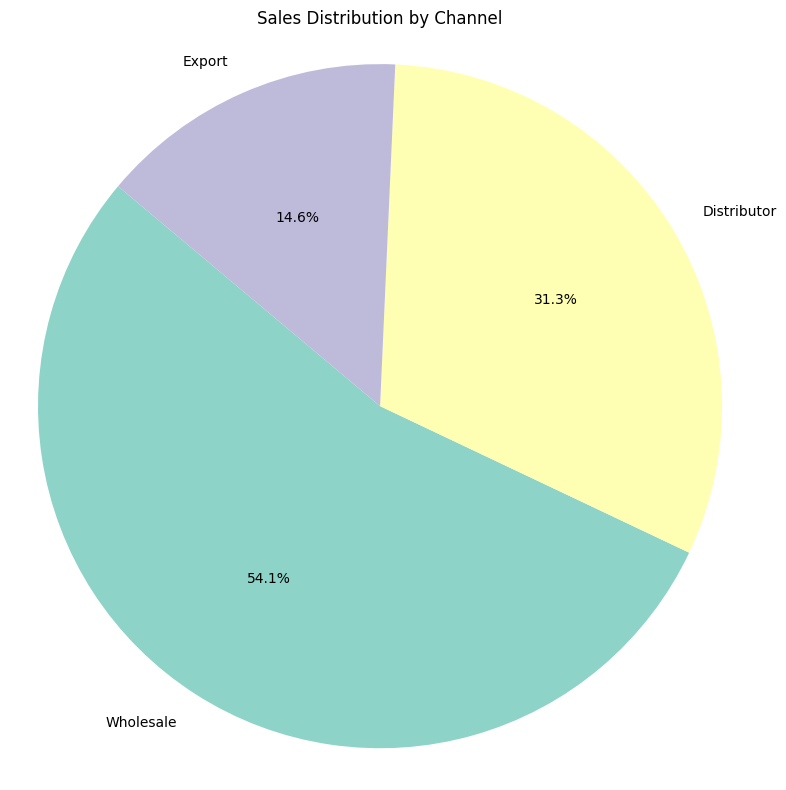

In [ ]:

# Ensure 'line total' is numeric
new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')

# Group by channel and sum revenue
sales_by_channel = (
    new_df.groupby('channel')['line total']
    .sum()
    .sort_values(ascending=False)
)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sales_by_channel,
    labels=sales_by_channel.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors  # Nice pastel color palette
)

plt.title('Sales Distribution by Channel')
plt.axis('equal')  # Keeps the pie chart circular
plt.tight_layout()
plt.show()


# **Average Order Value**

/tmp/ipython-input-1397897397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')


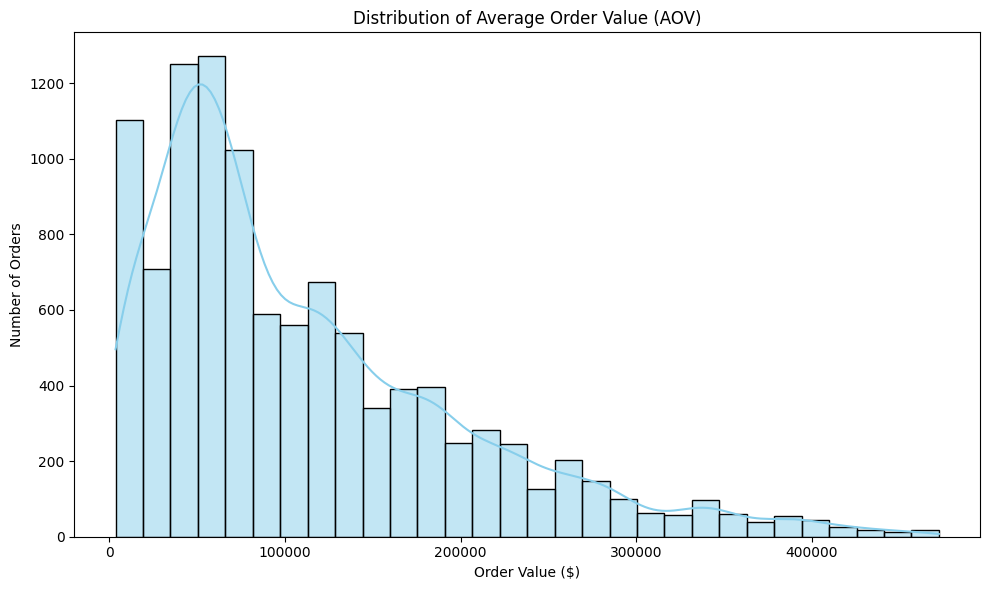

In [ ]:

# Ensure correct dtypes
new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')

# Calculate total order value per ordernumber
order_totals = new_df.groupby('ordernumber')['line total'].sum().reset_index()
order_totals.rename(columns={'line total': 'order_value'}, inplace=True)

# Plot histogram of order values
plt.figure(figsize=(10, 6))
sns.histplot(order_totals['order_value'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Average Order Value (AOV)')
plt.xlabel('Order Value ($)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()




1.   Unit Price Distribution per Product
2.   Top 10 States by Revenue and Order Count
3.  Average profit Margin by Channel   
4. Top and Bottom 10 Customers by Revenue
5. Customer Segmentation : Revenue VS Profit Margin
6. Correlation Heatmap










/tmp/ipython-input-2618677464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['unit price'] = pd.to_numeric(new_df['unit price'], errors='coerce')
/tmp/ipython-input-2618677464.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='product name', y='unit price', palette='Set2')


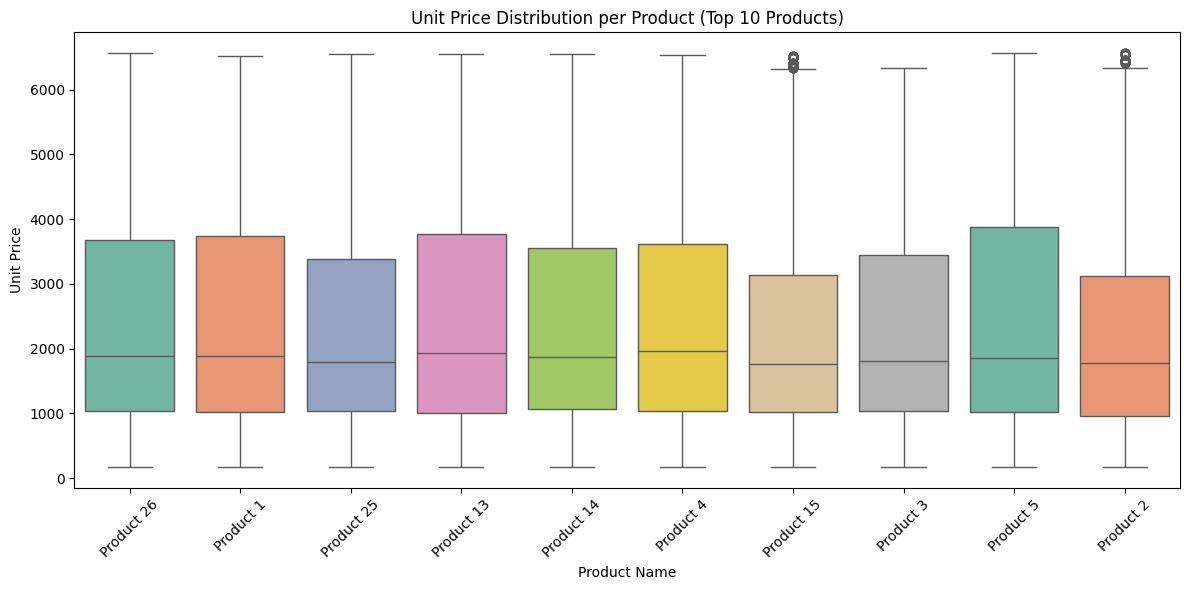

In [ ]:

# Ensure 'unit price' is numeric
new_df['unit price'] = pd.to_numeric(new_df['unit price'], errors='coerce')

# Optional: focus on top N products by frequency or revenue (if too many)
top_products = (
    new_df['product name']
    .value_counts()
    .head(10)
    .index
)

filtered_df = new_df[new_df['product name'].isin(top_products)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='product name', y='unit price', palette='Set2')

plt.title('Unit Price Distribution per Product (Top 10 Products)')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4247668046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')
/tmp/ipython-input-4247668046.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states_revenue, x='total_revenue', y='state', ax=axes[0], palette='Blues_d')
/tmp/ipython-input-4247668046.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states_orders, x='order_count', y='

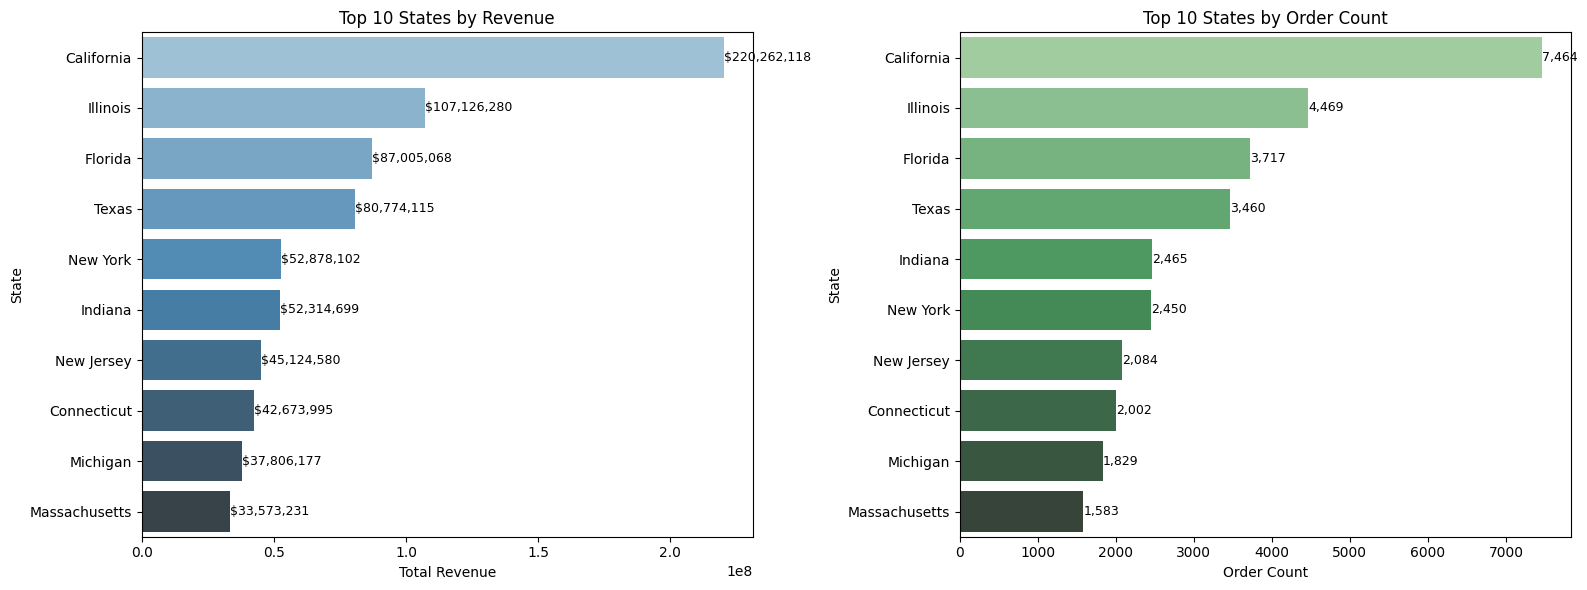

In [ ]:


# Ensure proper dtypes
new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')

# Group by state to calculate revenue and order count
state_summary = new_df.groupby('state').agg({
    'line total': 'sum',
    'ordernumber': pd.Series.nunique  # Count of unique orders
}).rename(columns={'line total': 'total_revenue', 'ordernumber': 'order_count'})

# Get top 10 states by revenue
top_states_revenue = state_summary.sort_values('total_revenue', ascending=False).head(10).reset_index()

# Get top 10 states by order count
top_states_orders = state_summary.sort_values('order_count', ascending=False).head(10).reset_index()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Revenue chart
sns.barplot(data=top_states_revenue, x='total_revenue', y='state', ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 States by Revenue')
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('State')
for i, (value, name) in enumerate(zip(top_states_revenue['total_revenue'], top_states_revenue['state'])):
    axes[0].text(value, i, f'${value:,.0f}', va='center', ha='left', fontsize=9)

# Order count chart
sns.barplot(data=top_states_orders, x='order_count', y='state', ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 States by Order Count')
axes[1].set_xlabel('Order Count')
axes[1].set_ylabel('State')
for i, (value, name) in enumerate(zip(top_states_orders['order_count'], top_states_orders['state'])):
    axes[1].text(value, i, f'{value:,}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


# **Average Profit Margin by Channel**

/tmp/ipython-input-1938955519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['profit_margin_percentage'] = pd.to_numeric(new_df['profit_margin_percentage'], errors='coerce')
/tmp/ipython-input-1938955519.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_margin_by_channel, x='channel', y='profit_margin_percentage', palette='pastel')


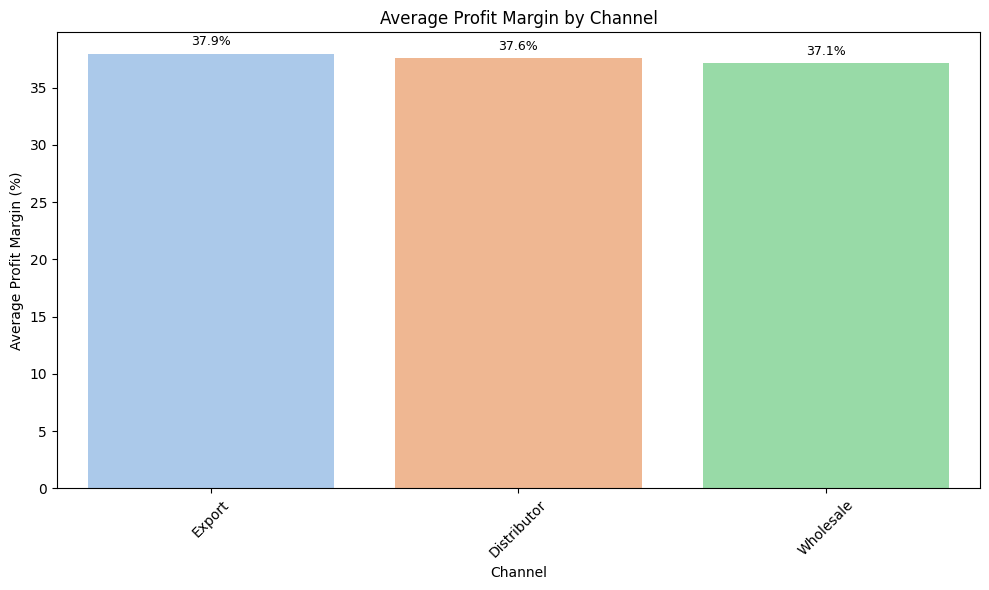

In [ ]:


# Ensure 'profit_margin_percentage' is numeric
new_df['profit_margin_percentage'] = pd.to_numeric(new_df['profit_margin_percentage'], errors='coerce')

# Group by channel and calculate average profit margin
avg_margin_by_channel = (
    new_df.groupby('channel')['profit_margin_percentage']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_margin_by_channel, x='channel', y='profit_margin_percentage', palette='pastel')

# Add labels on top of each bar
for i, (channel, margin) in enumerate(zip(avg_margin_by_channel['channel'], avg_margin_by_channel['profit_margin_percentage'])):
    ax.text(i, margin + 0.5, f'{margin:.1f}%', ha='center', va='bottom', fontsize=9)

plt.title('Average Profit Margin by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top and Bottom 10 Customers by Revenue

/tmp/ipython-input-725977493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')
/tmp/ipython-input-725977493.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-725977493.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


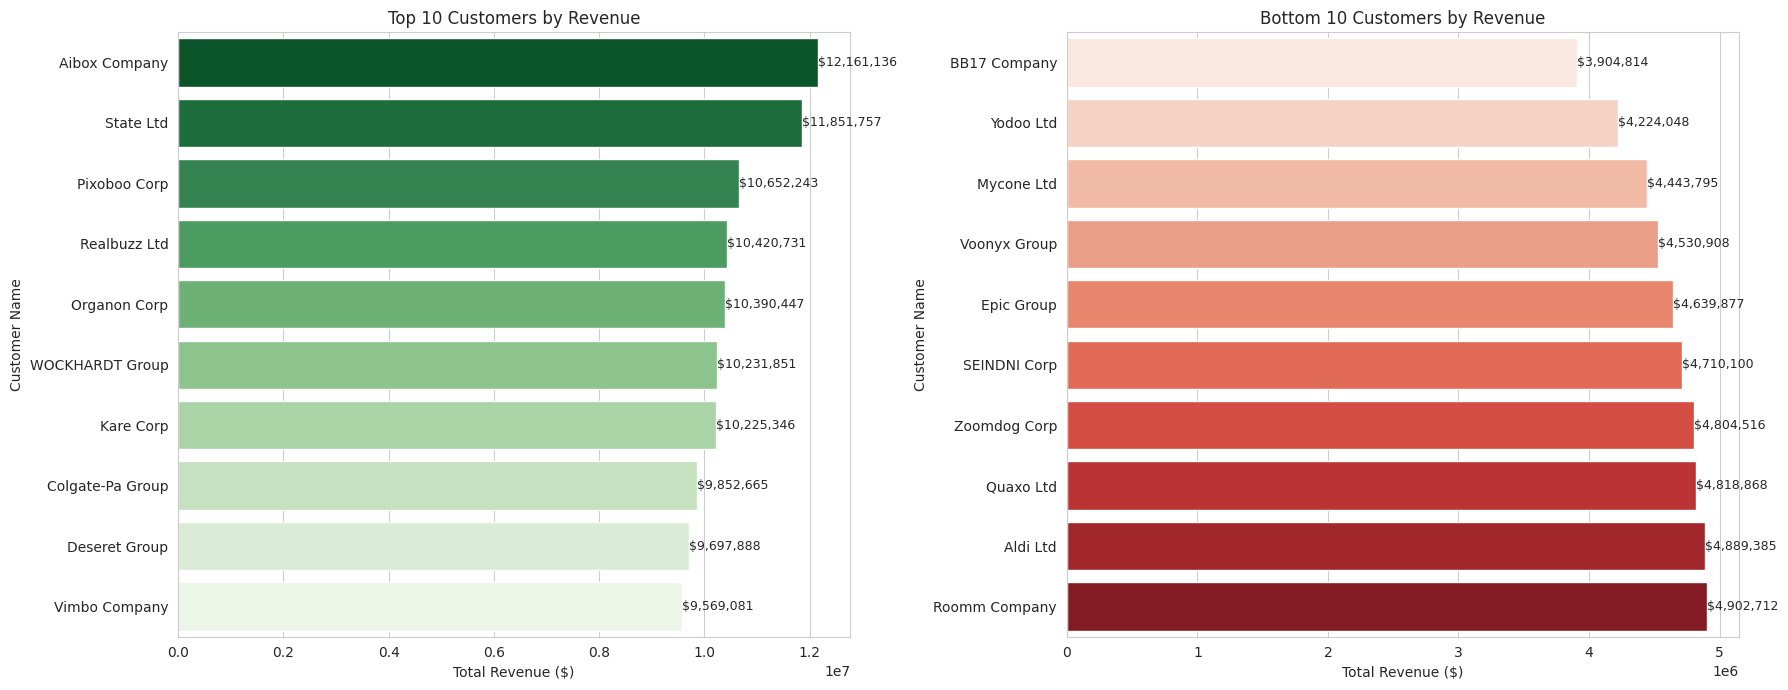

In [ ]:


new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')

# Aggregate revenue by customer
customer_revenue = (
    new_df.groupby('customer names')['line total']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'line total': 'total_revenue'})
)

# Split top and bottom 10
top_10_customers = customer_revenue.head(10)
bottom_10_customers = customer_revenue.tail(10).sort_values('total_revenue')  # Sort ascending for nice bars

# Set plot style
sns.set_style("whitegrid")

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Top 10 customers
sns.barplot(
    data=top_10_customers,
    x='total_revenue',
    y='customer names',
    ax=axes[0],
    palette='Greens_r'
)
axes[0].set_title('Top 10 Customers by Revenue')
axes[0].set_xlabel('Total Revenue ($)')
axes[0].set_ylabel('Customer Name')
for i, v in enumerate(top_10_customers['total_revenue']):
    axes[0].text(v, i, f"${v:,.0f}", va='center', ha='left', fontsize=9)

# Bottom 10 customers
sns.barplot(
    data=bottom_10_customers,
    x='total_revenue',
    y='customer names',
    ax=axes[1],
    palette='Reds'
)
axes[1].set_title('Bottom 10 Customers by Revenue')
axes[1].set_xlabel('Total Revenue ($)')
axes[1].set_ylabel('Customer Name')
for i, v in enumerate(bottom_10_customers['total_revenue']):
    axes[1].text(v, i, f"${v:,.0f}", va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


# Customer Segmentation Scatterplot (Revenue vs Profit Margin)

/tmp/ipython-input-1115720670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')
/tmp/ipython-input-1115720670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['profit_margin_percentage'] = pd.to_numeric(new_df['profit_margin_percentage'], errors='coerce')


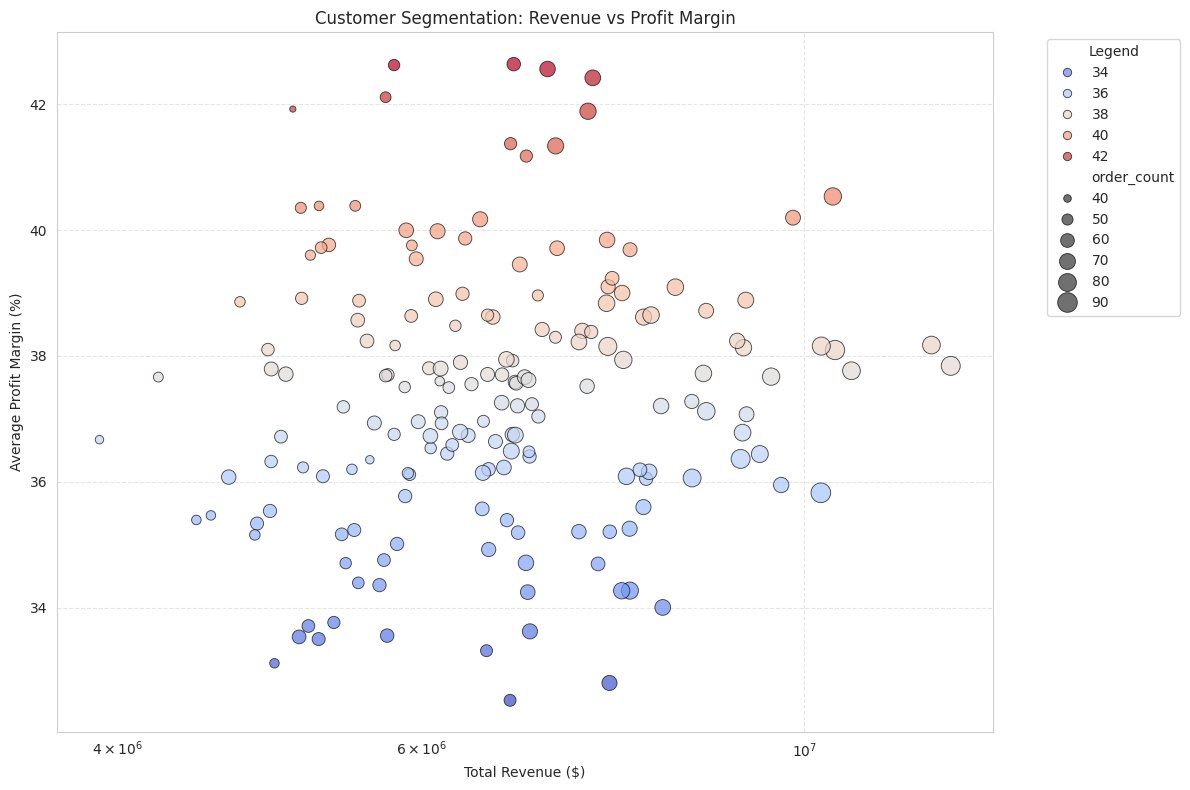

In [ ]:

new_df['line total'] = pd.to_numeric(new_df['line total'], errors='coerce')
new_df['profit_margin_percentage'] = pd.to_numeric(new_df['profit_margin_percentage'], errors='coerce')

# Aggregate revenue and avg profit margin by customer
customer_summary = new_df.groupby('customer names').agg({
    'line total': 'sum',
    'profit_margin_percentage': 'mean',
    'ordernumber': pd.Series.nunique  # optional: count unique orders
}).rename(columns={
    'line total': 'total_revenue',
    'profit_margin_percentage': 'avg_profit_margin',
    'ordernumber': 'order_count'
}).reset_index()

# Plot scatterplot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=customer_summary,
    x='total_revenue',
    y='avg_profit_margin',
    size='order_count',  # point size proportional to order count
    sizes=(20, 200),
    hue='avg_profit_margin',  # color by profit margin for gradient effect
    palette='coolwarm',
    alpha=0.7,
    edgecolor='k',
    legend='brief'
)

plt.title('Customer Segmentation: Revenue vs Profit Margin')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Average Profit Margin (%)')
plt.xscale('log')  # Log scale to handle wide revenue range, remove if not needed
plt.grid(True, linestyle='--', alpha=0.5)

# Improve legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Correlation Heatmap

/tmp/ipython-input-3378531486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = pd.to_numeric(new_df[col], errors='coerce')


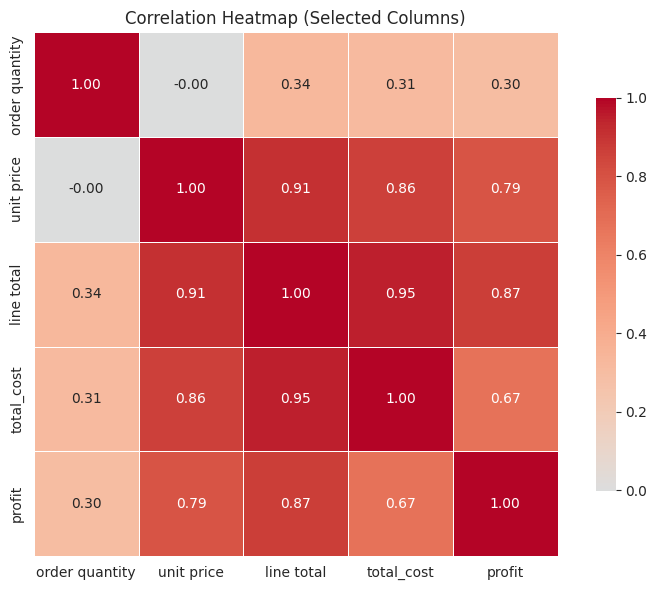

In [ ]:

cols = ['order quantity', 'unit price', 'line total', 'total_cost', 'profit']

# Convert to numeric
for col in cols:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

# Compute correlation matrix
corr_matrix = new_df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.75}
)

plt.title('Correlation Heatmap (Selected Columns)')
plt.tight_layout()
plt.show()


In [ ]:
new_df.to_csv('sales_data.csv')